### Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B6.mp4

- 45 seconds
- 1,080 frames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cv2

import os

In [2]:
os.getcwd()

'd:\\Assignments\\부스트캠프\\LV3\\프로젝트\\level3-product-serving-level3-cv-09\\examples\\realtime_animated_graph\\graph_with_video'

In [3]:
os.listdir()

['graph_with_video.ipynb',
 'graph_with_video.py',
 'output',
 'output-20220520T190255Z-001.zip',
 'video_play.py']

In [4]:
output_dir = './output/'
video_file = 'Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B6.mp4'

In [5]:
df = pd.read_csv(os.path.join(output_dir, f'{video_file}.csv'))

In [6]:
df

,Unnamed: 0,video,gt,off,on
0,0,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.555484,0.504341
1,1,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.555484,0.504341
2,2,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.555484,0.504341
3,3,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.555484,0.504341
4,4,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.555484,0.504341
...,...,...,...,...,...
1067,1067,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.032672,0.062636
1068,1068,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.032672,0.062636
1069,1069,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.032672,0.062636
1070,1070,Bad.Boys.1995__#01-11-55_01-12-40_label_G-B2-B...,0.0,0.032672,0.062636


### Graph (frame)

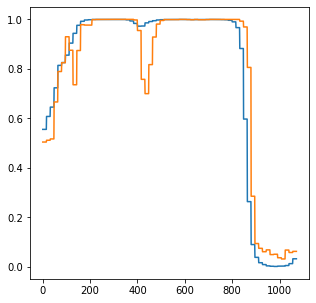

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.arange(len(df))
y_off = df['off']
y_on = df['on']

ax.plot(x, y_off)
ax.plot(x, y_on)

plt.show()

In [8]:
on_list = df['on']
off_list = df['off']

x = []
time = 1

on_score = 0
off_score = 0

y_on = []
y_off = []

for frame in range(len(df)):

    on_score += on_list[frame]
    off_score += off_list[frame]

    if frame % 24 == 23:
        x.append(time)
        time += 1

        y_on.append(on_score / 24)
        y_off.append(off_score / 24)

        on_score = 0
        off_score = 0

### Graph (seconds interpolation)

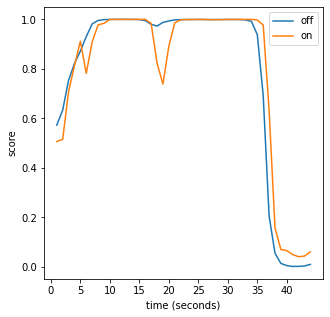

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(x, y_off, label='off')
ax.plot(x, y_on, label='on')

ax.set_xticks(np.arange(0, x[-1], 5))

ax.set_xlabel('time (seconds)')
ax.set_ylabel('score')

ax.legend()

plt.show()

In [10]:
video_dir = '../../../../videos/'

In [11]:
import cv2

cap = cv2.VideoCapture(os.path.join(video_dir, video_file))

In [12]:
if (cap.isOpened()== False): 
    print("Error opening video  file")